<a href="https://colab.research.google.com/github/kajanthyS/478Project/blob/main/image_denoising_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import cv2
import os
from skimage import measure

from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio

In [19]:
I = cv2.imread('/lenacolor256.png',0) 

In [20]:
# Add gaussian noise
noisy = random_noise(I, mode='gaussian',var=0.01) 

In [28]:
# Calculating mse
def mse(imageA, imageB):
    input = imageA.astype("float")
    output = imageB.astype("float")
    mse_const = mean_squared_error(input, output)
    return mse_const

In [38]:
#Calculating psnr 
def psnr(imageA, imageB):
    input = imageA.astype("float")
    output = imageB.astype("float")
    pnsr = peak_signal_noise_ratio(input, output)
    return pnsr

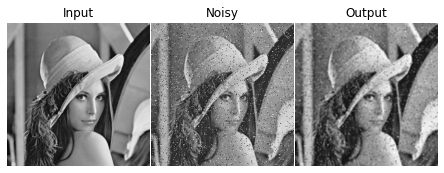

178.5130615234375

In [45]:
# Apply the mean filter 
output = cv2.boxFilter(noisy,-1,(3,3))
# or use cv2.blur() as shown below
# output = cv2.blur(noisy,(3,3))
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
mse(I,output)
#psnr(I,output)

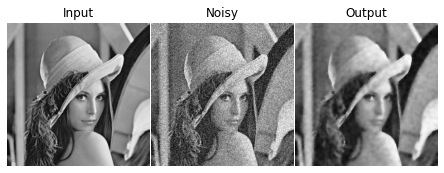

130.0327606201172

In [31]:
# Apply the bilateral filter 
#Input: 8-bit or floating-point, 1-channel or 3-channel image.
noisy8 = np.asarray(255*noisy, dtype = 'uint8')
output = cv2.bilateralFilter(noisy8,9,75,75)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
mse(I,output)

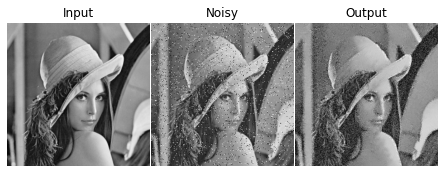

ValueError: ignored

In [44]:
# Apply the nonlocal means filter 
noisy_img=cv2.cvtColor(noisy8, cv2.COLOR_GRAY2BGR)
output = cv2.fastNlMeansDenoisingColored(noisy_img,None,10,10,7,21)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
mse(I,output)
#psnr(I,output)

In [34]:
#Add salt and pepper noise 
noisy = random_noise(I, mode='s&p',amount=0.05)
# The above function returns a floating-point image on the range [0, 1],
# thus we changed it to 'uint8' and from [0,255]
noisy = np.array(255*noisy, dtype = 'uint8')

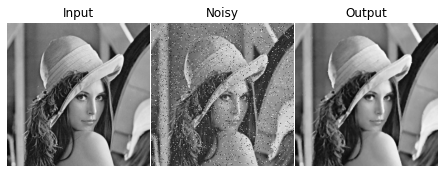

44.507537841796875

In [35]:
# Apply median filter 
output = cv2.medianBlur(noisy,3)
images = [I, noisy, output]
image_name = ['Input', 'Noisy', 'Output']
for i in range(3):
 plt.subplot(1,3,i+1),plt.imshow(images[i],cmap = 'gray')
 plt.title(image_name[i]), plt.axis('off')
 plt.tight_layout(.1)
plt.show()
mse(I,output)